In [1]:
# Import libraries and Datasets

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load data

# Read TSV file into DataFrame 
reviews_df = pd.read_table('/Users/zachariah/Downloads/amazon_alexa.tsv')
reviews_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [3]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [4]:
# get statistical summary

reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [5]:
#Drop ' rating','date','variation' columns, since they don't add value to our data

reviews_df = reviews_df.drop(['rating','date','variation'], axis = 1)

In [6]:
reviews_df

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1
...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1
3146,"Listening to music, searching locations, check...",1
3147,"I do love these things, i have them running my...",1
3148,Only complaint I have is that the sound qualit...,1


PERFORM DATA EXPLORATION

<AxesSubplot:>

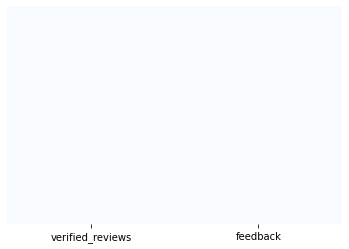

In [7]:
# check to see if we have missing elements in our dataframe using isnull()

sns.heatmap(reviews_df.isnull(), yticklabels=False, cbar=False, cmap ='Blues')

Output is blank screen: showing that we have no null values

array([[<AxesSubplot:title={'center':'feedback'}>]], dtype=object)

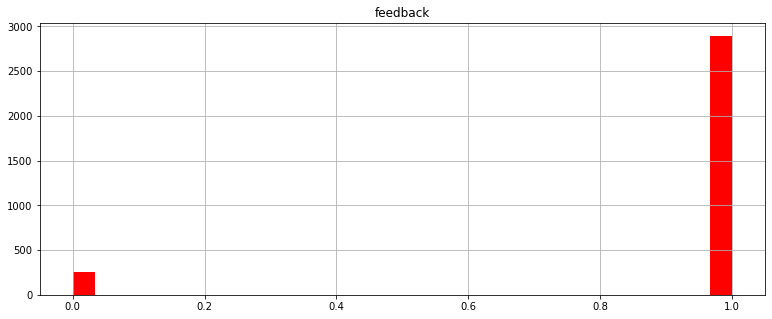

In [8]:
# plot histogram for the reviews

reviews_df.hist(bins = 30, figsize=(13,5), color = 'red')


'Feedback' is output column. It shows two different classes 0 and 1 & how many samples we have of each. 
Class 1 has a little less than 3000 samples. Class 0 has about 250 samples. 
We have an unbalanced dataset. 




/Users/zachariah/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='feedback', ylabel='count'>

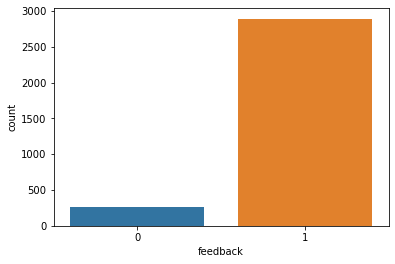

In [9]:
# using seaborn to do the same thing

sns.countplot(reviews_df['feedback'], label = 'Count')

In [13]:
# Get the length of each review: count how many characters in each review

reviews_df['length'] = reviews_df['verified_reviews'].apply(len)

reviews_df

,verified_reviews,feedback,length
0,Love my Echo!,1,13
1,Loved it!,1,9
2,"Sometimes while playing a game, you can answer...",1,195
3,I have had a lot of fun with this thing. My 4 ...,1,172
4,Music,1,5
...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,50
3146,"Listening to music, searching locations, check...",1,135
3147,"I do love these things, i have them running my...",1,441
3148,Only complaint I have is that the sound qualit...,1,380


In [14]:
# Statistical summary of dataframe

reviews_df.describe()

,feedback,length
count,3150.000000,3150.000000
mean,0.918413,132.049524
std,0.273778,182.099952
min,0.000000,1.000000
25%,1.000000,30.000000
50%,1.000000,74.000000
75%,1.000000,165.000000
max,1.000000,2851.000000


There is meaningful summary of our dataframe:
    
    The shortest review has 1 character
    The longest review has 2851 characters.
    And the average review is 132 character long.
    

In [15]:
# To view the shortest review

reviews_df[ reviews_df['length'] == 1]['verified_reviews']

60      😍
85       
183      
219      
374      
       ..
3114     
3120     
3123     
3126     
3141     
Name: verified_reviews, Length: 81, dtype: object

In [16]:
# The longest review

reviews_df[ reviews_df['length'] == 2851]['verified_reviews']


2016    Incredible piece of technology.I have this rig...
Name: verified_reviews, dtype: object

In [17]:
# to view the average length reviews

reviews_df[ reviews_df['length'] == 132]['verified_reviews']

570     Nice. It works good.Some times is not easy to ...
1655    awesome product! I am in the process of having...
1705    If you belong to amazon prime, I would think t...
2321    I expected to have access to more current movi...
2483    Works good for the most part. You ask it some ...
2834    Works good for the most part. You ask it some ...
Name: verified_reviews, dtype: object

In [18]:
# To view a specific reviews with average length: for example first review with 132 characters

reviews_df[ reviews_df['length'] == 132]['verified_reviews'].iloc[0]

'Nice. It works good.Some times is not easy to recognize your voice and you have to repeat several times, some time almost screaming.'

<AxesSubplot:ylabel='Frequency'>

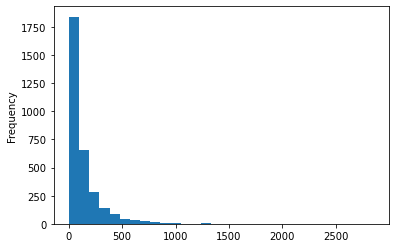

In [21]:
# Plot histogram of the length of reviews in dataframe

reviews_df['length'].plot(bins=30, kind = 'hist')

PLOT THE WORDCLOUD

In [27]:
# Create two new dataframes: postive reviews and negative reviews

positive = reviews_df[reviews_df['feedback'] == 1]
positive

,verified_reviews,feedback,length
0,Love my Echo!,1,13
1,Loved it!,1,9
2,"Sometimes while playing a game, you can answer...",1,195
3,I have had a lot of fun with this thing. My 4 ...,1,172
4,Music,1,5
...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,50
3146,"Listening to music, searching locations, check...",1,135
3147,"I do love these things, i have them running my...",1,441
3148,Only complaint I have is that the sound qualit...,1,380


In [24]:
negative = reviews_df[reviews_df['feedback'] == 0]
negative

,verified_reviews,feedback,length
46,"It's like Siri, in fact, Siri answers more acc...",0,163
111,Sound is terrible if u want good music too get...,0,53
141,Not much features.,0,18
162,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,Sad joke. Worthless.,0,20
...,...,...,...
3047,Echo Dot responds to us when we aren't even ta...,0,120
3048,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,The only negative we have on this product is t...,0,240
3091,I didn’t order it,0,17


In [32]:
# Combine all the postive reviews into a list

positive_reviews = positive['verified_reviews'].tolist()
len(positive_reviews)

2893

In [31]:
positive_reviews

['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.',
 'Music',
 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.',
 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.',
 "I think this is the 5th one I've

In [34]:
# Join all sentences together and put them in a sentence as one string

positive_review_as_one_string = ''.join(positive_reviews)
positive_review_as_one_string


'Love my Echo!Loved it!Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.MusicI received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.I think this is the 5th one I\'ve purchased. I\'m working on getting

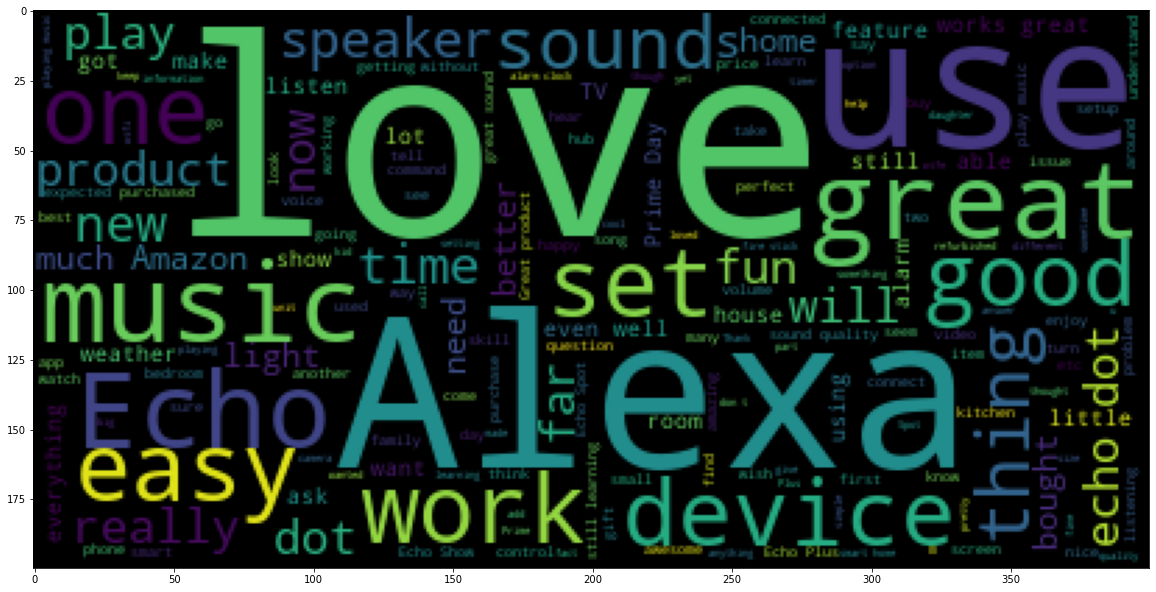

In [37]:
# Install wordcloud

#!pip install wordcloud

from wordcloud import WordCloud

# Plot wordcloud of positive reviews
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(positive_review_as_one_string))

The positive reviews have most frequent words: Love, Alexa, Use, great, good, echo, music, device, easy..

In [39]:
# Plot wordcloud for the negative reviews

# Put the negative reviews in a list


negative_reviews = negative['verified_reviews'].tolist()
len(negative_reviews)

257

In [43]:
# Join all the negative reviews into one string

negative_review_as_one_string = ''.join(negative_reviews)
negative_review_as_one_string 


'It\'s like Siri, in fact, Siri answers more accurately then Alexa.  I don\'t see a real need for it in my household, though it was a good bargain on prime day deals.Sound is terrible if u want good music too get a boseNot much features.Stopped working after 2 weeks ,didn\'t follow commands!? Really fun when it was working?Sad joke. Worthless.Really disappointed Alexa has to be plug-in to wall socket all the time.  My fault for not checking this, but made the assumption that a company has technologically advanced as Amazon would sell this product with a rechargeable battery.  If I could return it, I would as my Apple music and boom speaker give me more flexibility the Alexa.It\'s got great sound and bass but it doesn\'t work all of the time. Its still hot or miss when it recognizes thingsI am not super impressed with Alexa. When my Prime lapsed, she wouldn\'t play anything. She isn\'t smart enough to differentiate among spotify accounts so we can\'t use it for that either. She randomly

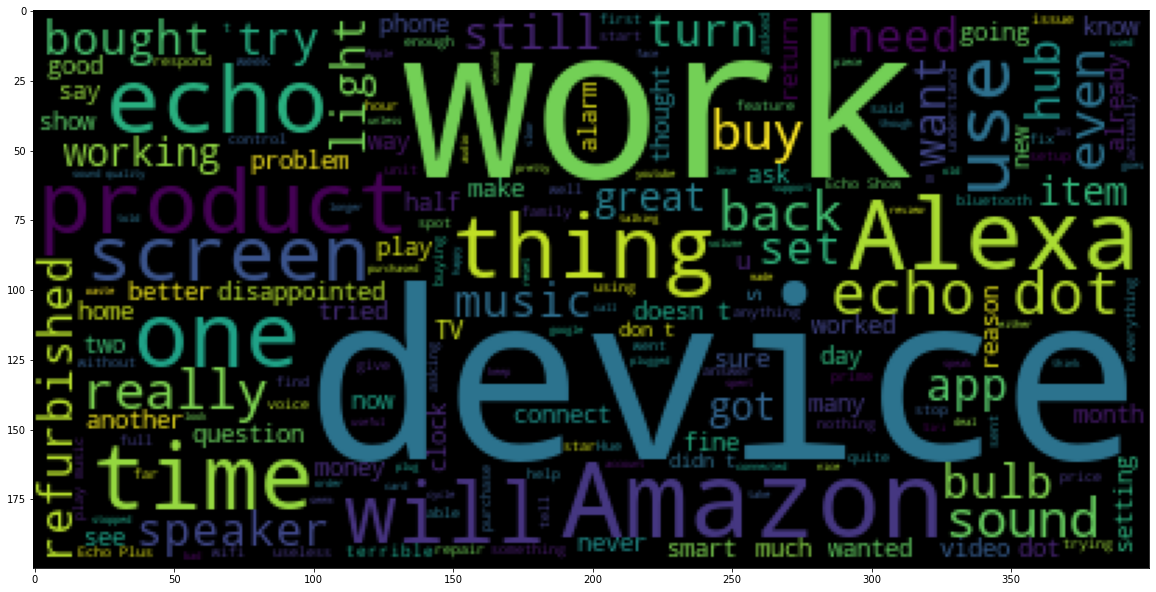

In [44]:
# plot the wordcount of negative reviews
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_review_as_one_string))

The wordcloud of negative reviews show most frequently used words as device, work, echo, amazon, alexa, product, screen, sound, time, refurbished..

CREATE A PIPELINE TO REMOVE PUNCTUATION, STOPWORDS FROM TEXT AND PERFORM VECTORIZATION




In [45]:
# Import library to remove punctuation from text

import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
# Import library to remove Stopwords

import nltk

nltk.download('stopwords')

# You have to download stopwords package to execute this command

from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zachariah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Let's define a pipeline to clean up all the reviews
This pipeline perfoems the following:
 1. remove punctuation
 2. remove stopwords

In [51]:
# First we will create a function

def review_cleaning(review):
    test_punc_removed = [ char for char in review if char not in string.punctuation]
    
    test_punc_removed_join = ''.join(test_punc_removed)
    
    test_punc_removed_join_clean = [ word  for word in test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return test_punc_removed_join_clean

In [52]:
# Lets test the newly added function

reviews_df_clean = reviews_df['verified_reviews'].apply(review_cleaning)

In [53]:
# Show the cleaned version

print(reviews_df_clean[5])

['received', 'echo', 'gift', 'needed', 'another', 'Bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'Can’t', 'wait', 'see', 'else']


In [57]:
# Show the original version
print(reviews_df['verified_reviews'][5])

I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.


In [59]:
# Define the cleaning pipeline

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = review_cleaning, dtype = np.uint8)

In [60]:
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])
print(vectorizer.get_feature_names())

['072318', '1', '10', '100', '1000', '100X', '1010', '1030pm', '11', '1100sf', '1220', '129', '12am', '15', '150', '19', '1964', '1990s', '1990’s', '1GB', '1rst', '1st', '2', '20', '200', '2000', '2017', '2030', '229', '23', '2448', '247', '24GHZ', '24ghz', '25', '29', '299', '2999', '2Original', '2nd', '2or', '2package', '3', '30', '300', '30so', '334', '34', '342nd', '3434', '34A34', '34Alexa', '34Alexa34', '34Certified', '34Computer34', '34Dot34', '34Drop', '34First', '34Hub', '34I', '34Im', '34NEVER', '34Philips', '34Play', '34Second', '34Skills34', '34Tell', '34The', '34Things', '34Thongs', '34Try', '34Whats', '34alexa34', '34card34', '34cycle', '34cycle34', '34fixes34', '34fun34', '34group34', '34hear34', '34hmm', '34hmmm', '34it34', '34late', '34learn', '34light34', '34lights34', '34listen34', '34minor', '34outlet34', '34personal34', '34she34', '34show', '34smart', '34smart34', '34sorry', '34spying34', '34the', '34thick34', '34things', '34this', '34trouble', '34try', '34turn', '

/Users/zachariah/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [61]:
print(reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [62]:
reviews_countvectorizer.shape

(3150, 5211)

In [63]:
# Define a dataframe 

X = pd.DataFrame(reviews_countvectorizer.toarray())

In [64]:
X

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The output is tokenized version which will be used to train our model

In [66]:
y = reviews_df['feedback']

TRAIN AND EVALUATE A NAIVE BAYES CLASSIFIER MODEL

In [68]:
X.shape

(3150, 5211)

In [69]:
y.shape


(3150,)

In [70]:
# Import libraries

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB



We train a model on 80% of data and once model is trained, we access its performance on the remaining 20%
We access the model on unbaised data, that the model has never seen before during training



In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [74]:
# Create a object of MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

CONFUSION MATRIX

In [75]:
# Import libraries

from sklearn.metrics import classification_report, confusion_matrix


<AxesSubplot:>

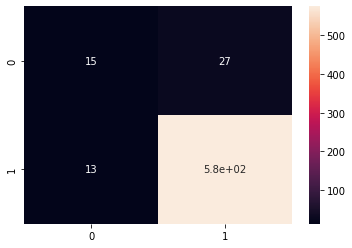

In [76]:
# Predicting the test set results

y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [77]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.54      0.36      0.43        42
           1       0.96      0.98      0.97       588

    accuracy                           0.94       630
   macro avg       0.75      0.67      0.70       630
weighted avg       0.93      0.94      0.93       630

